# Intern Name:- Yogesh Rajgure
# Task 3 : Prediction using Decision Tree Algorithm


#### The Sparks Foundation
##### Data Science and Business Analytics Inteernship July 2021 

* Create the Decision Tree classifier and visualize it graphically.
* The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

Dataset can be found at [https://bit.ly/3kXTdox]

### Importing libraries

In [1]:
import sklearn.datasets as datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

### Reading data

In [2]:
iris = datasets.load_iris()

In [3]:
# taking features in df

df = pd.DataFrame(iris.data, columns=iris.feature_names)
print(df.shape)
df.head()

(150, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
df['sepal length (cm)'].min()

4.3

In [5]:
# taking target in y

y = iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

**As we we can see that, we have 3 categories, which can be identified from the data..
So, we can clearly see that this is a classification problem for the supervised ML.**

**There are multiple ways in which we can solve classification problem,**

**1. Logistic Regression**\
but we are not using this approach because, we have three categories and logistic reg. does not work well for for than 2 categories


**2. Hence we use 'Decision Tree Algorithm'**

### Scaling our data

In [6]:
scalar = StandardScaler()

x_transform = scalar.fit_transform(df)

### Making Train-Test split

In [7]:
x_train,x_test,y_train,y_test = train_test_split(df,y,test_size = 0.2, random_state= 355)

### Now let us define the Decision Tree Algorithm

In [8]:
clf_model = DecisionTreeClassifier()

In [9]:
clf_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [10]:
clf_model.score(x_train,y_train)

1.0

In [11]:
clf_model.score(x_test,y_test)

1.0

### Generally, when we have large data, score of 1.0 for train data shows us that model is overfitted, but as we have very less amount of data, we can conclude that for given data, we found the tree that correctly classifies based on given features..

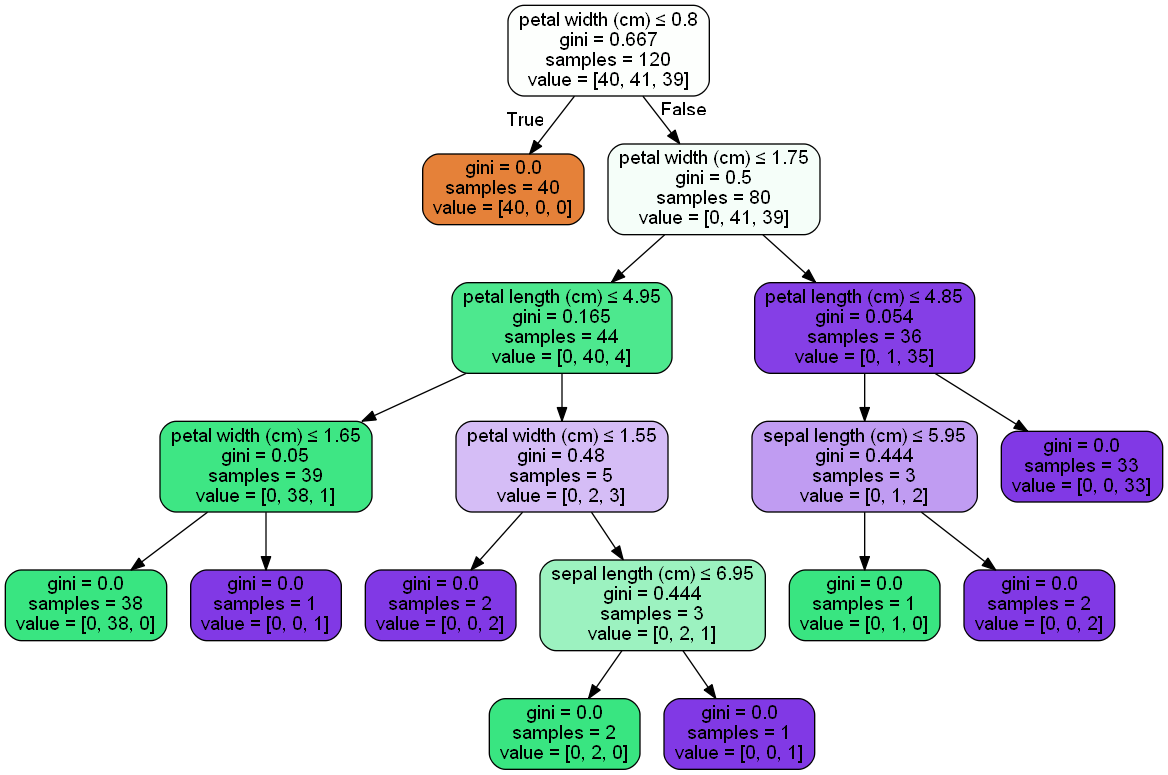

In [12]:

# Visualize the graph
dot_data = StringIO()
export_graphviz(clf_model, out_file=dot_data, feature_names=iris.feature_names,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [13]:
my_pred = clf_model.predict(x_test)
my_pred

array([2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 0, 0, 0, 0, 0, 1, 2, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 1])

In [14]:
y_test

array([2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 0, 0, 0, 0, 0, 1, 2, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 1])

In [15]:
a = pd.DataFrame( y_test, my_pred).reset_index()
a.columns = ['actual_y', 'predicted_y']
z = pd.concat([x_test, a], axis=1)

In [16]:
z.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),actual_y,predicted_y
0,NaN,NaN,NaN,NaN,2.0,2.0
1,NaN,NaN,NaN,NaN,1.0,1.0
2,4.7,3.2,1.3,0.2,1.0,1.0
3,NaN,NaN,NaN,NaN,1.0,1.0
4,NaN,NaN,NaN,NaN,1.0,1.0


## Thank you..